# Victor Manuel Gómez Espinosa
# Cimat - Unidad Monterrey
# Ciencia de datos

# Librerias y funciones

In [1]:
import numpy as np

In [3]:
import pandas as pd

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [4]:
import matplotlib.pyplot as plt
#plt.subplot(1,2,1) #subplot plt.figure(figsize = (14,9))
#plt.scatter(x,y)
#plt.axhline(y=LC, color='r', linestyle='--'), plt.axvline
#plt.xlim([1,50+5]) #plt.ylim([0,90+5]), plt.grid(), plt.axis('equal'), plt.axis('square'), plt.legend(loc='upper right')
#plt.xlabel('X1'), plt.ylabel('X1'), plt.title('a=0.5 ')
#plt.show()
#plt.hist(x), plt.boxplot(residuals, vert=False) #df.scatter(x='col1',y='col2',c='col3', cmap='magma')
#%matplotlib inline 
import seaborn as sns
# f, ax = plt.subplots(figsize=(14,9)) #subplots and zise
# fig.add_subplot(131)
# plt.title('KERNEL K-MEANS (Gaussian)')
# sns.scatterplot(x='x1', y='x2', data = data_toyg, hue='cl')
# sns.pairplot(df, hue='category') # scatter matrix
# sns.boxplot(data=df,orient="h") #boxplot horizontal
# sns.distplot(residuals)
# sns.jointplot("x1", "x2", data=df, kind="kde") #marginal densities and countour
# sns.heatmap(round(df.corr(),2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
# t= f.suptitle('Correlation Heatmap', fontsize=14)
# sns.lmplot("x", "y", data=df) sns.residplot("x", "y", data=df)
# sns.countplot(x='class',data=df, hue='sex')

import plotly.express as px
#fig = px.scatter(df, x='colname1', y='colname2', hover_data=['colname3'])

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

# 1) Replicar resultados articulo

In [6]:
train=pd.read_csv('train.csv')
unique_m=pd.read_csv('unique_m.csv')

In [7]:
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [8]:
# datos para el modelo
y=train.critical_temp.values
X=train.drop(columns=['critical_temp']).values

In [9]:
y=y.reshape(-1,1)

In [12]:
# modelo y prediccion
reg=LinearRegression()
reg.fit(X,y)
y_pred=reg.predict(X)

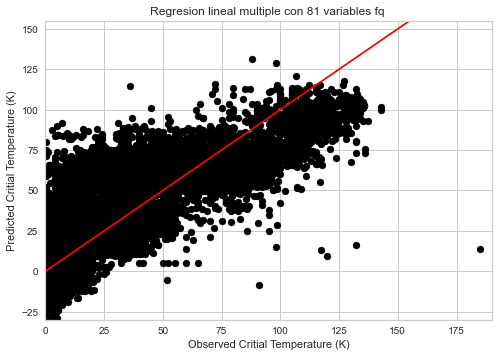

In [20]:
# Figura 8
xl=[0,200]
yl=[0,200]
#plt.figure(figsize = (15,10))
plt.plot(xl,yl, color='red')
plt.scatter(y,y_pred,color='black')
plt.xlim([0,190])
plt.ylim([-30,155])
plt.xlabel('Observed Critial Temperature (K)'), plt.ylabel('Predicted Critial Temperature (K)'), plt.title('Regresion lineal multiple con 81 variables fq ')
plt.show()


In [13]:
def OutofSampleRMSE(X,y):
    lmse=[]
    lr2=[]
    lmae=[]
    for i in range(25):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)
        # modelo y prediccion
        reg=LinearRegression()
        reg.fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        mse=mean_squared_error(y_test,y_pred)
        r2=r2_score(y_test,y_pred)
        mae=median_absolute_error(y_test,y_pred)
        
        lmse.append(mse)
        lr2.append(r2)
        lmae.append(mae)
    
    mses=np.array(lmse)
    r2s=np.array(lr2)
    maes=np.array(lmae)
    
    msem=round(np.mean(mses),2)
    rmse=round(np.sqrt(msem),2)
    r2m=round(np.mean(r2s),2)
    maem=round(np.mean(maes),2)
    return(rmse,r2m,maem)

In [14]:
from datetime import datetime

startTime = datetime.now()
rmse,r2m,maem=OutofSampleRMSE(X,y)
print(datetime.now() - startTime)
print(rmse,r2m,maem)

0:00:01.635539
17.65 0.74 10.21
